<a href="https://colab.research.google.com/github/Andresitooom/repositorioa-final-analisi/blob/main/Proyecto_analisis_latinoamrica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def graficar_emisiones_por_pais(df):
    paises_latinoamerica = [
        'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
        'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras',
        'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela'
    ]

    # Filtrar DataFrame
    df_filtrado = df[(df["Entity"].isin(paises_latinoamerica)) & (df["Year"] >= 2000)]

    # Convertir emisiones a gigatoneladas
    df_filtrado["Emisiones_Gt"] = df_filtrado["Annual CO₂ emissions"] / 1e9

    # Crear gráfico
    plt.figure(figsize=(14, 7))
    for pais in paises_latinoamerica:
        datos_pais = df_filtrado[df_filtrado["Entity"] == pais]
        plt.plot(datos_pais["Year"], datos_pais["Emisiones_Gt"], label=pais)

    plt.title("Emisiones de CO₂ por país en Latinoamérica (2000–actualidad)")
    plt.xlabel("Año")
    plt.ylabel("Emisiones (gigatoneladas)")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<ipython-input-1-85b535332dcf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["Emisiones_Gt"] = df_filtrado["Annual CO₂ emissions"] / 1e9


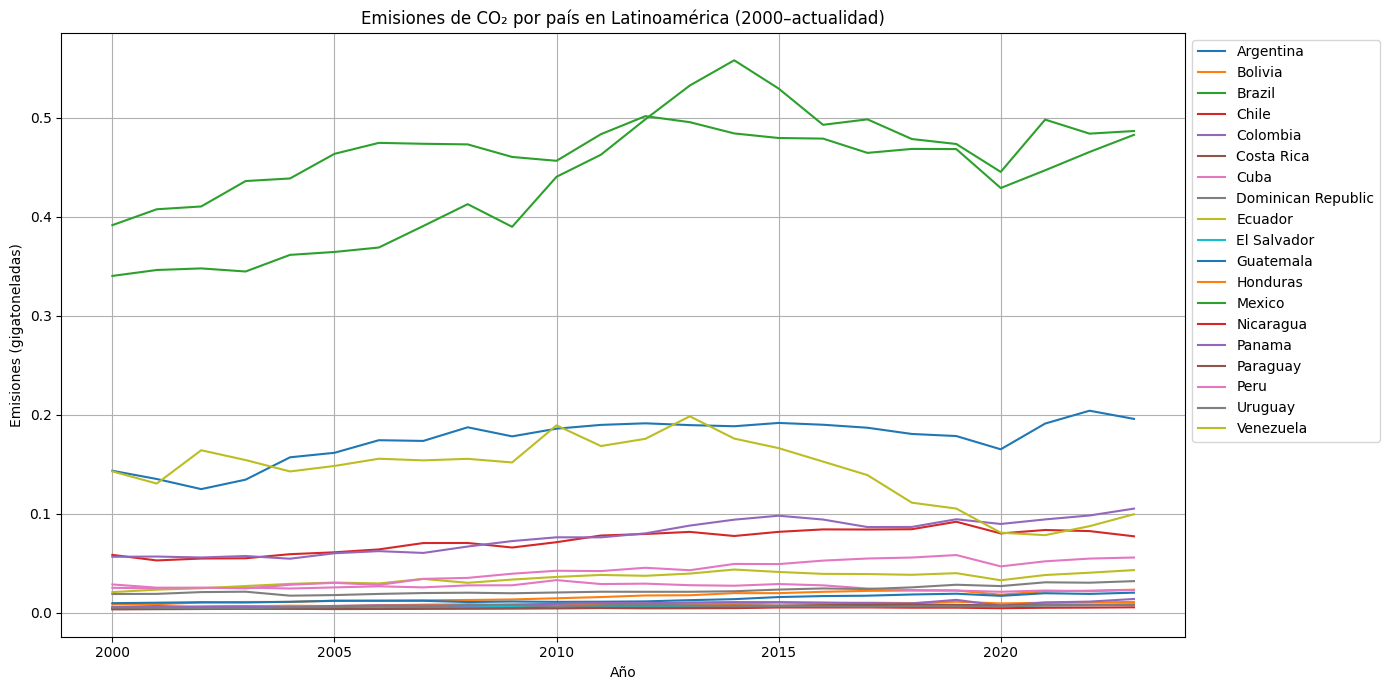

In [ ]:
df = pd.read_csv("/content/annual-co2-emissions-per-country.csv")
graficar_emisiones_por_pais(df)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def graficar_emisiones_latinoamerica(df):
    # Lista de países de Latinoamérica (puedes agregar más si es necesario)
    paises_latinoamerica = [
        'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
        'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras',
        'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela'
    ]

    # Filtrar datos desde el año 2000 y solo de los países latinoamericanos
    df_filtrado = df[
        (df['Entity'].isin(paises_latinoamerica)) &
        (df['Year'] >= 2000)
    ]

    # Agrupar por año y sumar las emisiones, luego convertir a gigatoneladas
    emisiones_latam = df_filtrado.groupby("Year")["Annual CO₂ emissions"].sum() / 1e9

    # Graficar
    plt.figure(figsize=(12, 6))
    plt.plot(emisiones_latam.index, emisiones_latam.values, marker='o', color='green')
    plt.title("Emisiones de CO₂ en Latinoamérica (2000–actualidad)")
    plt.xlabel("Año")
    plt.ylabel("Emisiones (gigatoneladas)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


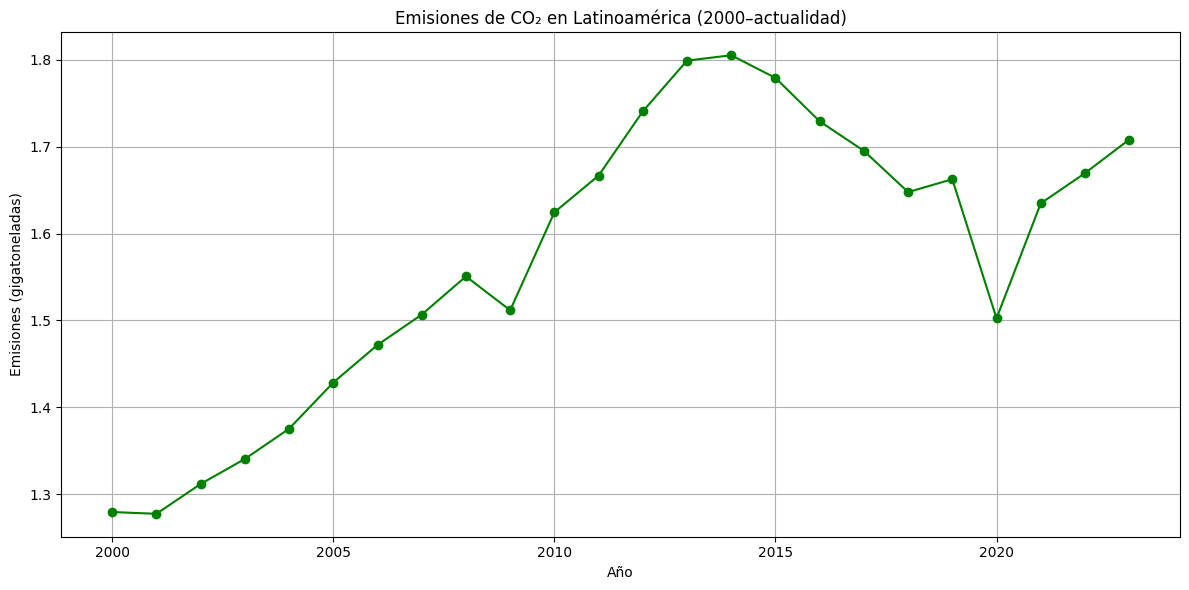

In [ ]:
graficar_emisiones_latinoamerica(df)

In [ ]:
import plotly.express as px
import pandas as pd

# Lista de países latinoamericanos
paises_latinoamerica = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
    'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras',
    'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela'
]

# Filtrar datos desde el año 2000 en adelante para países latinoamericanos
df_mapa = df[(df["Entity"].isin(paises_latinoamerica)) & (df["Year"] >= 2000)].copy()

# Convertir emisiones a gigatoneladas
df_mapa["Emisiones GT"] = df_mapa["Annual CO₂ emissions"] / 1e9

# Crear categorías de emisiones por rangos
bins = [0, 0.1, 0.5, 1, 2, 5, 10, 20]
labels = ["<0.1", "0.1–0.5", "0.5–1", "1–2", "2–5", "5–10", ">10"]
df_mapa["Rango de emisiones (GT)"] = pd.cut(df_mapa["Emisiones GT"], bins=bins, labels=labels)

# Crear mapa animado
fig = px.choropleth(
    df_mapa,
    locations="Code",
    color="Rango de emisiones (GT)",
    hover_name="Entity",
    animation_frame="Year",
    title="🌎 Emisiones de CO₂ en Latinoamérica (2000–actualidad, animado por año)",
    template="plotly_white",
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(
    title_font_size=22,
    geo=dict(showframe=False, showcoastlines=True, projection_type="natural earth")
)

fig.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, wilcoxon
from math import sqrt

# Definir países y año de política de mitigación
politicas = {
    "Brazil": 2016,
    "Mexico": 2020,
    "Argentina": 2020,

}

# DataFrame filtrado por países importantes
df_filtrado = df[df["Entity"].isin(politicas.keys()) & (df["Year"] >= 2000)].copy()

resultados = []

for pais, anio_mitigacion in politicas.items():
    df_pais = df_filtrado[df_filtrado["Entity"] == pais]

    antes = df_pais[(df_pais["Year"] >= anio_mitigacion - 5) & (df_pais["Year"] < anio_mitigacion)]
    despues = df_pais[(df_pais["Year"] >= anio_mitigacion) & (df_pais["Year"] < anio_mitigacion + 5)]

    min_len = min(len(antes), len(despues))
    if min_len < 3:
        print(f"{pais}: No hay suficientes datos para el análisis.")
        continue

    antes = antes.tail(min_len)["Annual CO₂ emissions"].values
    despues = despues.head(min_len)["Annual CO₂ emissions"].values

    # Prueba t
    t_stat, p_t = ttest_rel(antes, despues)

    # Wilcoxon
    try:
        w_stat, p_w = wilcoxon(antes, despues)
    except:
        p_w = np.nan

    # Cambio porcentual promedio
    cambio_pct = np.mean((despues - antes) / antes) * 100

    # Tamaño del efecto (Cohen's d)
    diff = despues - antes
    cohen_d = diff.mean() / diff.std(ddof=1)

    resultados.append({
        "País": pais,
        "Año mitigación": anio_mitigacion,
        "p (t-test)": p_t,
        "p (Wilcoxon)": p_w,
        "Cambio promedio (%)": cambio_pct,
        "Cohen's d": cohen_d
    })


In [ ]:
df_resultados = pd.DataFrame(resultados)
print(df_resultados.round(3))


        País  Año mitigación  p (t-test)  p (Wilcoxon)  Cambio promedio (%)  \
0     Brazil            2016       0.170         0.188               -6.936   
1     Mexico            2020       0.379         0.375               -2.947   
2  Argentina            2020       0.670         0.875                2.972   

   Cohen's d  
0     -0.747  
1     -0.515  
2      0.235  


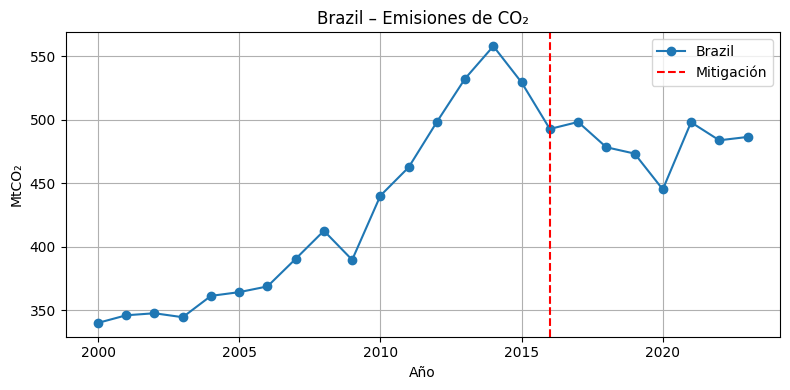

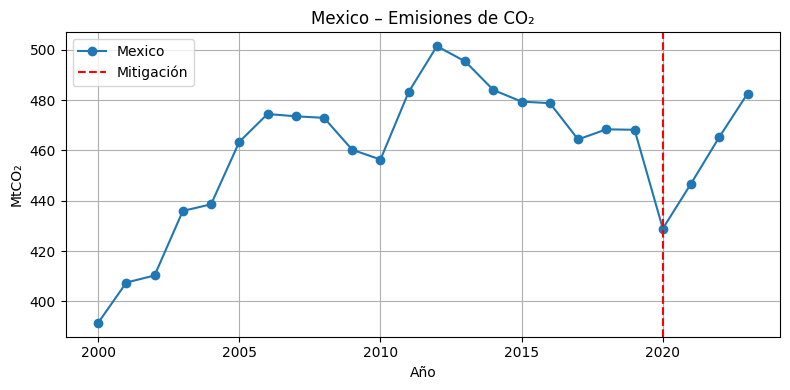

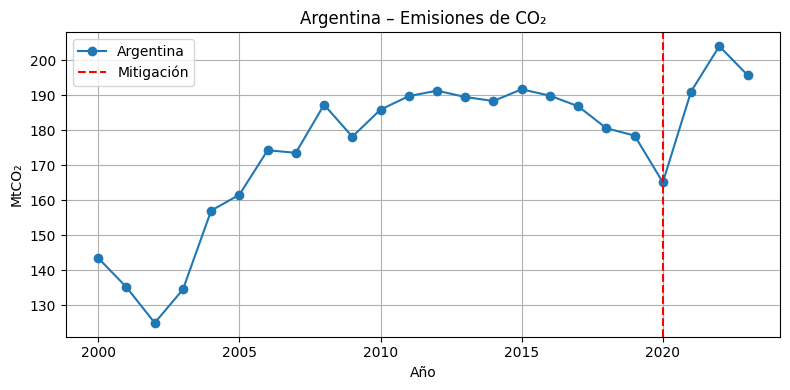

In [ ]:
for pais, anio_mitigacion in politicas.items():
    df_pais = df_filtrado[df_filtrado["Entity"] == pais]

    plt.figure(figsize=(8, 4))
    plt.plot(df_pais["Year"], df_pais["Annual CO₂ emissions"] / 1e6, marker='o', label=pais)
    plt.axvline(anio_mitigacion, color='red', linestyle='--', label="Mitigación")
    plt.title(f"{pais} – Emisiones de CO₂")
    plt.xlabel("Año")
    plt.ylabel("MtCO₂")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


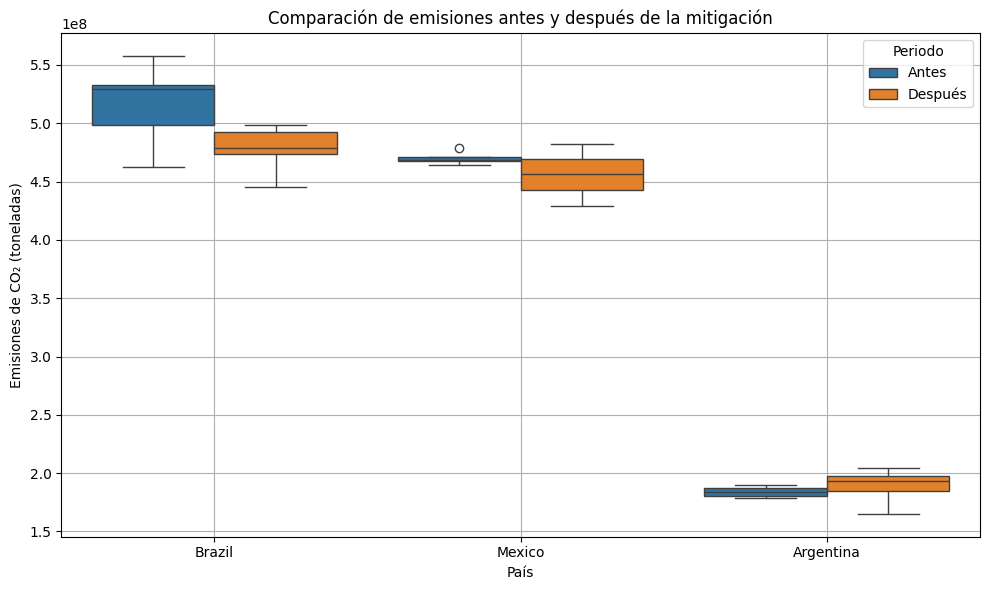

In [ ]:
datos_box = []

for pais, anio_mitigacion in politicas.items():
    df_pais = df_filtrado[df_filtrado["Entity"] == pais]
    antes = df_pais[(df_pais["Year"] >= anio_mitigacion - 5) & (df_pais["Year"] < anio_mitigacion)]
    despues = df_pais[(df_pais["Year"] >= anio_mitigacion) & (df_pais["Year"] < anio_mitigacion + 5)]

    min_len = min(len(antes), len(despues))
    if min_len < 3:
        continue

    antes = antes.tail(min_len)
    despues = despues.head(min_len)

    datos_box.extend([
        {"País": pais, "Periodo": "Antes", "Emisiones": x} for x in antes["Annual CO₂ emissions"]
    ])
    datos_box.extend([
        {"País": pais, "Periodo": "Después", "Emisiones": x} for x in despues["Annual CO₂ emissions"]
    ])

df_box = pd.DataFrame(datos_box)

plt.figure(figsize=(10, 6))
sns.boxplot(x="País", y="Emisiones", hue="Periodo", data=df_box)
plt.title("Comparación de emisiones antes y después de la mitigación")
plt.ylabel("Emisiones de CO₂ (toneladas)")
plt.grid(True)
plt.tight_layout()
plt.show()


Interpretación
Si el valor p < 0.05, entonces hay evidencia estadística de un cambio en las emisiones tras la implementación de políticas.

Compara los resultados de la prueba t (paramétrica) y Wilcoxon (no paramétrica) para mayor robustez.

Si no se observa diferencia significativa, puede indicar que las políticas aún no tienen impacto medible o que el efecto es más largo plazo.